In [1]:
import pandas as pd

In [3]:
bank=pd.read_csv("C:\\Users\\lenovo\\Desktop\\bank-full.csv")

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank1=bank.drop('marital',axis=1)

In [6]:
bank1=bank1.drop('default',axis=1)

In [7]:
bank1=bank1.drop('housing',axis=1)

In [8]:
bank1=bank1.drop('pdays',axis=1)

In [9]:
bank1=bank1.drop('previous',axis=1)

In [10]:
bank1.head()

,age,job,education,balance,loan,contact,day,month,duration,campaign,poutcome,y
0,58,management,tertiary,2143,no,unknown,5,may,261,1,unknown,no
1,44,technician,secondary,29,no,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,secondary,2,yes,unknown,5,may,76,1,unknown,no
3,47,blue-collar,unknown,1506,no,unknown,5,may,92,1,unknown,no
4,33,unknown,unknown,1,no,unknown,5,may,198,1,unknown,no


In [11]:
bank1.info

<bound method DataFrame.info of        age           job  education  balance loan    contact  day month  \
0       58    management   tertiary     2143   no    unknown    5   may   
1       44    technician  secondary       29   no    unknown    5   may   
2       33  entrepreneur  secondary        2  yes    unknown    5   may   
3       47   blue-collar    unknown     1506   no    unknown    5   may   
4       33       unknown    unknown        1   no    unknown    5   may   
...    ...           ...        ...      ...  ...        ...  ...   ...   
45206   51    technician   tertiary      825   no   cellular   17   nov   
45207   71       retired    primary     1729   no   cellular   17   nov   
45208   72       retired  secondary     5715   no   cellular   17   nov   
45209   57   blue-collar  secondary      668   no  telephone   17   nov   
45210   37  entrepreneur  secondary     2971   no   cellular   17   nov   

       duration  campaign poutcome    y  
0           261         1

In [12]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   education  45211 non-null  object
 3   balance    45211 non-null  int64 
 4   loan       45211 non-null  object
 5   contact    45211 non-null  object
 6   day        45211 non-null  int64 
 7   month      45211 non-null  object
 8   duration   45211 non-null  int64 
 9   campaign   45211 non-null  int64 
 10  poutcome   45211 non-null  object
 11  y          45211 non-null  object
dtypes: int64(5), object(7)
memory usage: 4.1+ MB


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
bank1.y=LabelEncoder().fit_transform(bank1.y)
bank1.job=LabelEncoder().fit_transform(bank1.job)
bank1.education=LabelEncoder().fit_transform(bank1.education)
bank1.loan=LabelEncoder().fit_transform(bank1.loan)
bank1.contact=LabelEncoder().fit_transform(bank1.contact)
bank1.month=LabelEncoder().fit_transform(bank1.month)
bank1.poutcome=LabelEncoder().fit_transform(bank1.poutcome)
bank1.head()

,age,job,education,balance,loan,contact,day,month,duration,campaign,poutcome,y
0,58,4,2,2143,0,2,5,8,261,1,3,0
1,44,9,1,29,0,2,5,8,151,1,3,0
2,33,2,1,2,1,2,5,8,76,1,3,0
3,47,1,3,1506,0,2,5,8,92,1,3,0
4,33,11,3,1,0,2,5,8,198,1,3,0


In [15]:
#Splitting_data_into_X_and_Y.

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
X = bank1.iloc[:,0:10]
Y = bank1.iloc[:,11]

In [18]:
#Fit_the_model

In [19]:
classifier=LogisticRegression()
classifier.fit(X,Y)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
#Prediction_for_x_dataset

In [21]:
y_pred = classifier.predict(X)

In [22]:
y_pred_df=pd.DataFrame({'actual': Y,'predicted_prob':classifier.predict(X)})

In [23]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [24]:
#Confusion_Matrix

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39277   645]
 [ 4439   850]]


In [26]:
((39277+851)/(39277+645+4438+851))*100

88.75716086793037

In [27]:
#Classification_Report

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



In [30]:
#ROC_Curve

Text(0, 0.5, 'True Positive Rate')

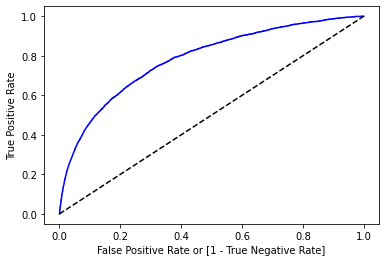

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc=roc_auc_score(Y,y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='blue',label='logit model (area = %0.2f)'%auc)
plt.plot([0 ,1], [0, 1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [32]:
auc

0.5722772021247824